## Import

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, r2_score, mean_absolute_error

In [143]:
df_red = pd.read_csv("winequality-red.csv", sep=";")

df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [144]:
df_white = pd.read_csv("winequality-white.csv", sep=";")

df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Обьдинение датасетов

In [145]:
df_red["type"] = "red"
df_white["type"] = "white"

df = pd.concat([df_red, df_white], ignore_index=True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## Анализ данных и построение графиков 

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [147]:
# Проверка на NaN
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [148]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

<Axes: xlabel='count', ylabel='quality'>

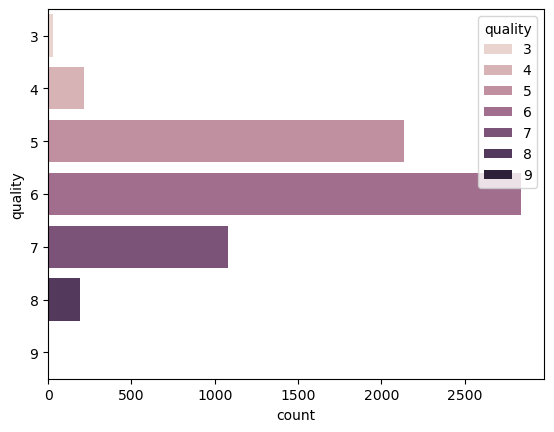

In [149]:
# график countplot отображающий количество каждой категории вин

sns.countplot(y=df['quality'], data=df, hue="quality")

<Axes: xlabel='count', ylabel='type'>

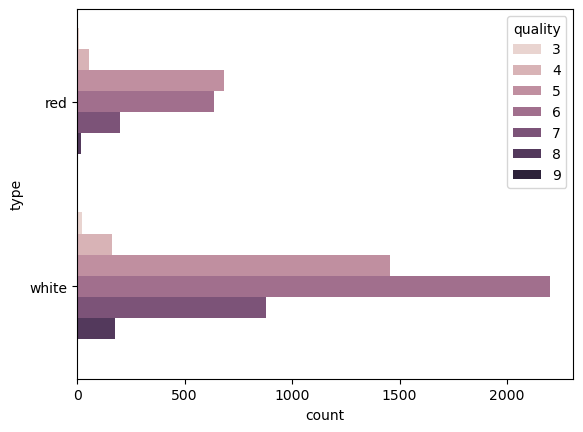

In [150]:
sns.countplot(y="type", data=df, hue="quality")

In [151]:
df_red = df[df['type'] == 'red']
df_wht = df[df['type'] != 'red']

## Сдреним по качеству считаются вина со значением 6, все что ниже - плохого качества, все что выше - хорошее 

In [152]:
print("Процент низкого качества красных вин")
print(100 * len(df_red[df_red["quality"] <= 4]) / len(df_red)) 

Процент низкого качества красных вин
3.9399624765478425


In [153]:
print("Процент низкого качества белых вин")
print(100 * len(df_white[df_white["quality"] <=4]) / len(df_white))

Процент низкого качества белых вин
3.736218864842793


In [154]:
df.corr(numeric_only=True)["quality"]

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

<Axes: >

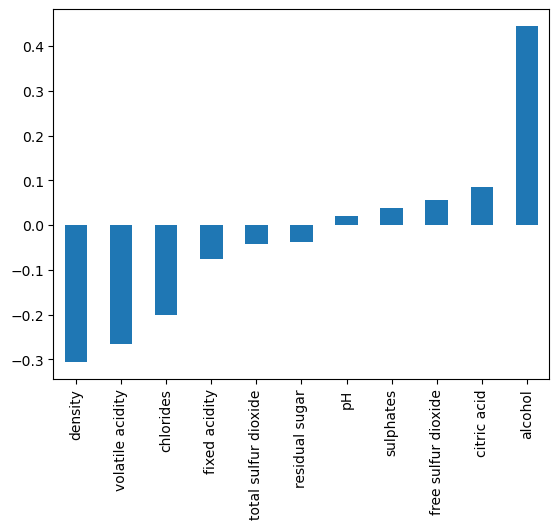

In [155]:
# график bar plot для корреляции вин

df.corr(numeric_only=True)['quality'][:-1].sort_values().plot(kind='bar')

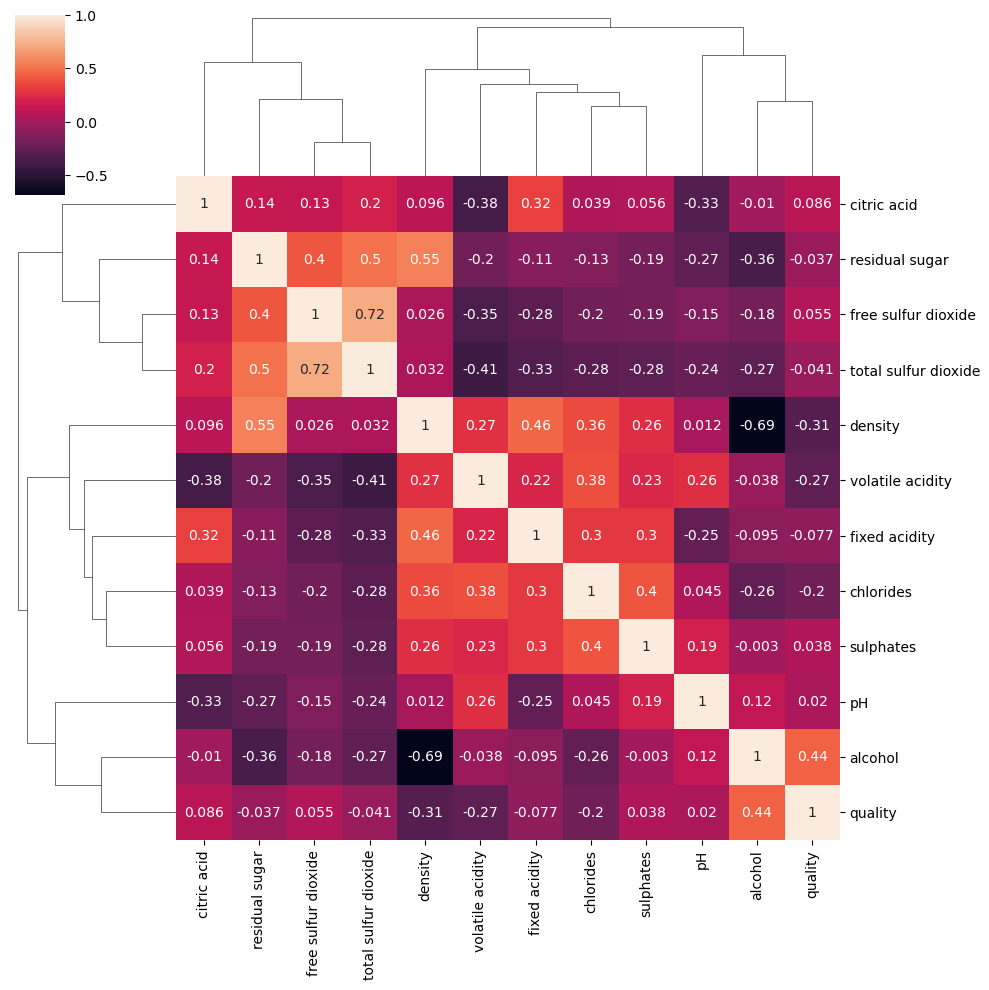

In [156]:
sns.clustermap(data=df.corr(numeric_only=True), annot=True)

## Первичный Анализ и модель машинного обучения

In [157]:
df['type'] = pd.get_dummies(df['type'], drop_first=True).astype(int)

#### Разделение данных на признаки и целевую переменную

In [158]:
X = df.drop("quality", axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
scaler = StandardScaler()
svc = SVC()

operations = [('scaler', scaler),("svc", svc)]

pipe = Pipeline(operations)

In [160]:
param_grid = {'svc__class_weight': ['balanced'],
              "svc__C": [0.001, 0.01, 0.1, 0.5, 1],
              'svc__gamma': ['scale', 'auto']}

In [161]:
full_svc_model = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

full_svc_model.fit(X_train, y_train)

d:\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 0.5, 1],
                         'svc__class_weight': ['balanced'],
                         'svc__gamma': ['scale', 'auto']},
             scoring='accuracy')

In [162]:
full_svc_model.best_params_

{'svc__C': 1, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale'}

In [163]:
pred = full_svc_model.predict(X_test)

In [164]:
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)

print("R^2:", r2)
print("MAE:", mae)

R^2: -0.6810560319963079
MAE: 0.7876923076923077


In [165]:
cm = confusion_matrix(pred, y_test)

cm

array([[  1,   4,   8,  17,   1,   2,   0],
       [  2,  22,  89,  56,   5,   1,   0],
       [  2,   9, 215, 155,   8,   0,   0],
       [  1,   7,  63, 172,  46,   3,   0],
       [  0,   1,  16, 142,  89,  13,   0],
       [  0,   0,  10,  55,  66,  16,   0],
       [  0,   0,   1,   0,   0,   1,   1]], dtype=int64)

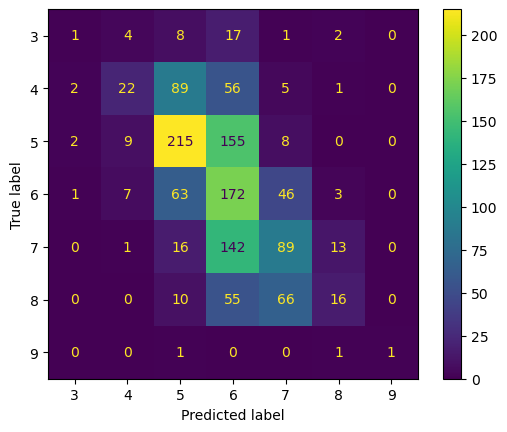

In [166]:
disp = ConfusionMatrixDisplay(cm, display_labels=full_svc_model.classes_)

disp.plot()

In [167]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           3       0.17      0.03      0.05        33
           4       0.51      0.13      0.20       175
           5       0.53      0.55      0.54       389
           6       0.29      0.59      0.39       292
           7       0.41      0.34      0.37       261
           8       0.44      0.11      0.17       147
           9       1.00      0.33      0.50         3

    accuracy                           0.40      1300
   macro avg       0.48      0.30      0.32      1300
weighted avg       0.43      0.40      0.37      1300



## Создание нейронной сети 

In [168]:
X = df.drop("quality", axis=1)
y = df['quality']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [169]:
# Сдвигаем метки
y_train_cat = to_categorical(y_train - y_train.min())  
y_test_cat = to_categorical(y_test - y_test.min())

In [170]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(y_train_cat.shape[1], activation='softmax'))

d:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [171]:
# Компеляция модели 

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [172]:
# Обучение 
history = model.fit(X_train, y_train_cat, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3410 - loss: 1.5769 - val_accuracy: 0.5462 - val_loss: 1.1428
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.5345 - loss: 1.1260 - val_accuracy: 0.5875 - val_loss: 1.0640
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.5446 - loss: 1.0996 - val_accuracy: 0.5885 - val_loss: 1.0329
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.5581 - loss: 1.0807 - val_accuracy: 0.5904 - val_loss: 1.0207
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.5665 - loss: 1.0529 - val_accuracy: 0.5942 - val_loss: 1.0112
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.5781 - loss: 1.0193 - val_accuracy: 0.5894 - val_loss: 1.0086
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.5809 - loss: 1.0082 - val_accuracy: 0.5856 - val_loss: 0.9952
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.5699 - loss: 1.0415 - va

In [173]:
# Оценка обучения 
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1) + y_train.min()

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R^2:", r2)
print("MAE:", mae)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step
R^2: 0.21571549436603477
MAE: 0.49923076923076926


In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       0.50      0.16      0.25        43
           5       0.54      0.73      0.62       402
           6       0.57      0.54      0.56       597
           7       0.45      0.37      0.40       215
           8       0.33      0.03      0.05        36
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1300
   macro avg       0.48      0.28      0.31      1300
weighted avg       0.53      0.54      0.52      1300



d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [175]:
cm = confusion_matrix(pred, y_test)

cm

array([[  1,   4,   8,  17,   1,   2,   0],
       [  2,  22,  89,  56,   5,   1,   0],
       [  2,   9, 215, 155,   8,   0,   0],
       [  1,   7,  63, 172,  46,   3,   0],
       [  0,   1,  16, 142,  89,  13,   0],
       [  0,   0,  10,  55,  66,  16,   0],
       [  0,   0,   1,   0,   0,   1,   1]], dtype=int64)

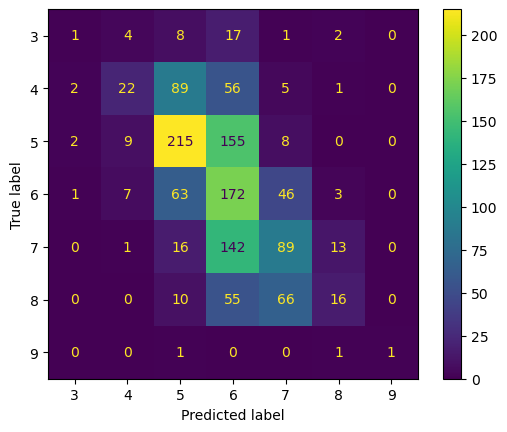

In [176]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test)) 
disp.plot()